<a href="https://colab.research.google.com/github/San-lab-ship/Prediccion-Produccion-Agricola/blob/main/Predicci%C3%B3n_de_Producci%C3%B3n_Agr%C3%ADcola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# 🔹 Importar librerías
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score
import plotly.express as px
import folium

# -----------------------------
# 1️⃣ Simular datos de ejemplo
# -----------------------------
np.random.seed(42)
n = 100
data = pd.DataFrame({
    'Region': np.random.choice(['Norte', 'Sur', 'Este', 'Oeste'], n),
    'Parcela': [f'P{i+1}' for i in range(n)],
    'Produccion_Real': np.random.uniform(50, 200, n),
})

# Simular predicciones del modelo
data['Prediccion'] = data['Produccion_Real'] * np.random.uniform(0.85, 1.15, n)

# Coordenadas de ejemplo para Folium (lat, lon)
data['Lat'] = np.random.uniform(-5, 5, n)
data['Lon'] = np.random.uniform(-5, 5, n)

# -----------------------------
# 2️⃣ Métricas de Evaluación
# -----------------------------
# MAPE
data['APE'] = np.abs((data['Produccion_Real'] - data['Prediccion']) / data['Produccion_Real'])
MAPE = data['APE'].mean() * 100

# SMAPE
data['SMAPE'] = np.abs(data['Prediccion'] - data['Produccion_Real']) / ((np.abs(data['Prediccion']) + np.abs(data['Produccion_Real']))/2)
SMAPE = data['SMAPE'].mean() * 100

# Accuracy ±10%
accuracy_10 = np.mean(np.abs(data['Prediccion'] - data['Produccion_Real']) <= 0.1 * data['Produccion_Real']) * 100

# R²
R2 = r2_score(data['Produccion_Real'], data['Prediccion']) * 100

# NSE (Nash-Sutcliffe Efficiency)
NSE = 1 - np.sum((data['Produccion_Real'] - data['Prediccion'])**2) / np.sum((data['Produccion_Real'] - data['Produccion_Real'].mean())**2)

# Mostrar métricas
print(f"MAPE: {MAPE:.2f}%")
print(f"SMAPE: {SMAPE:.2f}%")
print(f"Accuracy ±10%: {accuracy_10:.2f}%")
print(f"R²: {R2:.2f}%")
print(f"NSE: {NSE:.2f}")

# -----------------------------
# 3️⃣ Visualización interactiva con Plotly
# -----------------------------
fig = px.scatter(
    data, x='Produccion_Real', y='Prediccion', color='Region',
    labels={'Produccion_Real': 'Producción Real', 'Prediccion': 'Predicción'},
    title='Producción Real vs Predicha por Región',
    hover_data=['Parcela']
)
fig.add_shape(
    type='line', x0=data['Produccion_Real'].min(), x1=data['Produccion_Real'].max(),
    y0=data['Produccion_Real'].min(), y1=data['Produccion_Real'].max(),
    line=dict(color='Red', dash='dash')
)
fig.show()

# -----------------------------
# 4️⃣ Mapa interactivo con Folium
# -----------------------------
m = folium.Map(location=[0,0], zoom_start=2)

for idx, row in data.iterrows():
    folium.CircleMarker(
        location=[row['Lat'], row['Lon']],
        radius=5,
        popup=f"Parcela: {row['Parcela']}<br>Producción Real: {row['Produccion_Real']:.2f}<br>Predicción: {row['Prediccion']:.2f}",
        color='green' if row['Prediccion'] >= row['Produccion_Real'] else 'red',
        fill=True,
        fill_opacity=0.7
    ).add_to(m)

# Guardar el mapa interactivo en HTML
m.save('dashboard_interactivo.html')
print("Mapa interactivo guardado como 'dashboard_interactivo.html'.")


MAPE: 7.88%
SMAPE: 7.89%
Accuracy ±10%: 63.00%
R²: 93.87%
NSE: 0.94


Mapa interactivo guardado como 'dashboard_interactivo.html'.


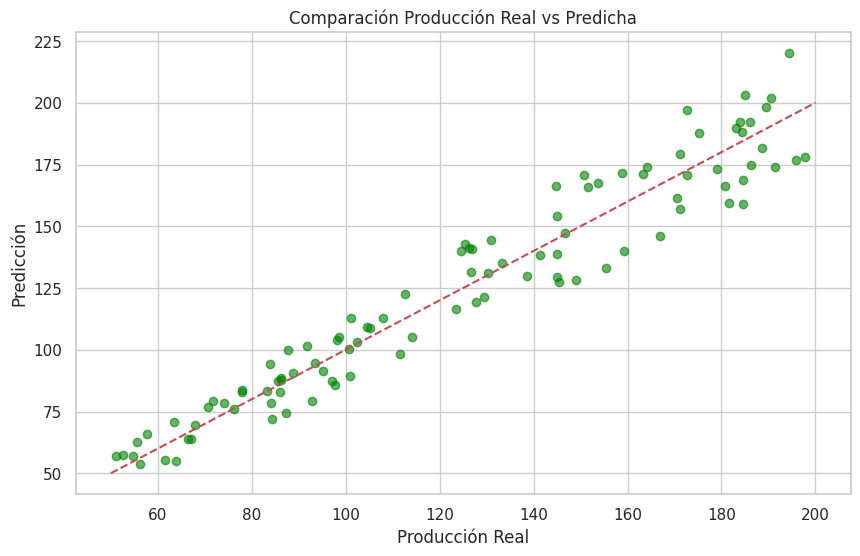

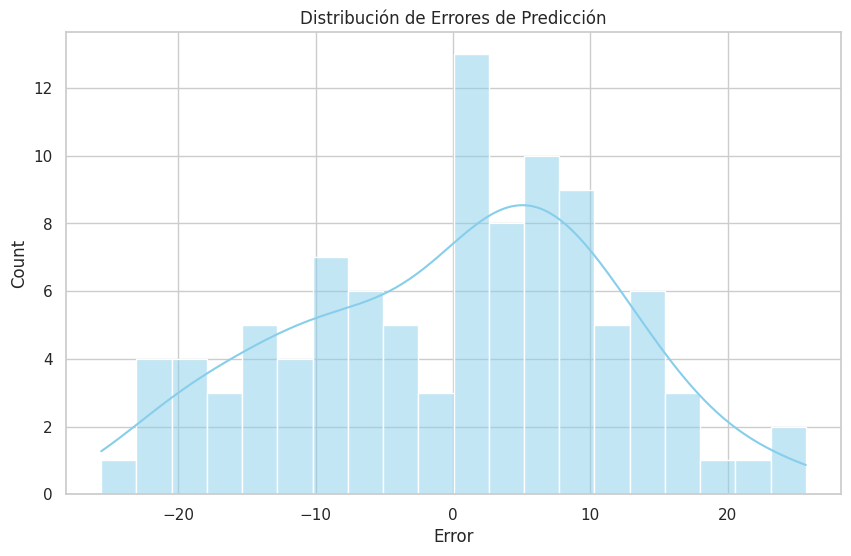

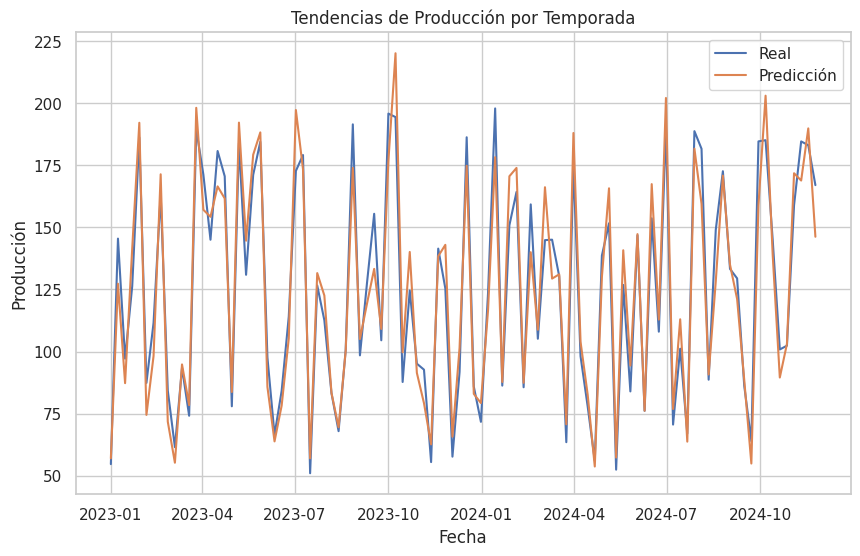

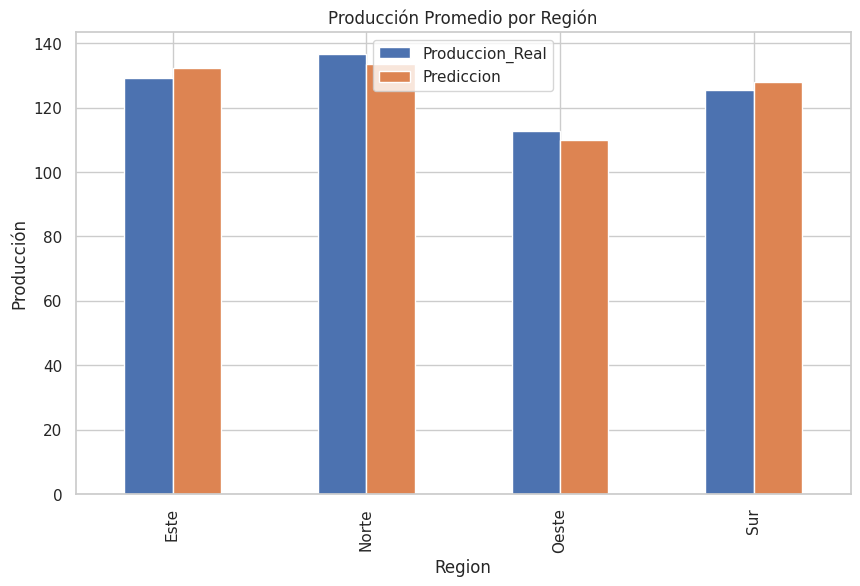

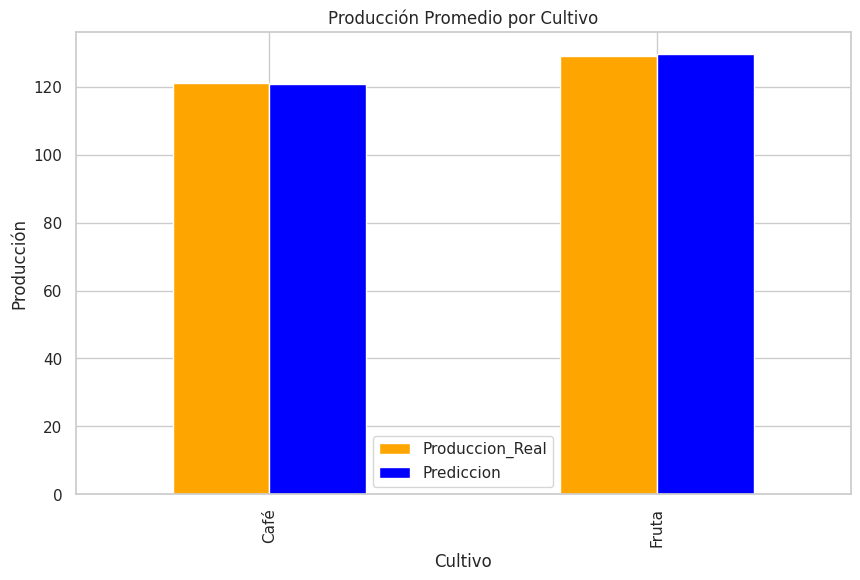

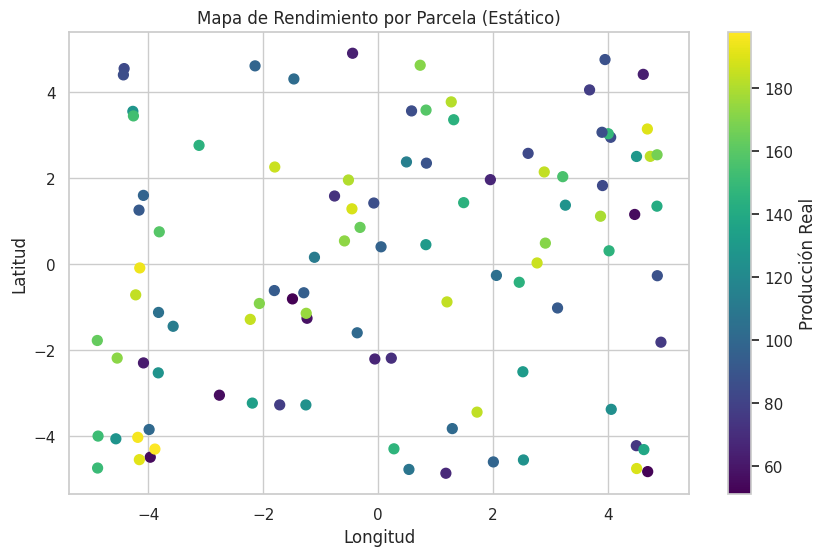

/tmp/ipython-input-3941436256.py:94: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




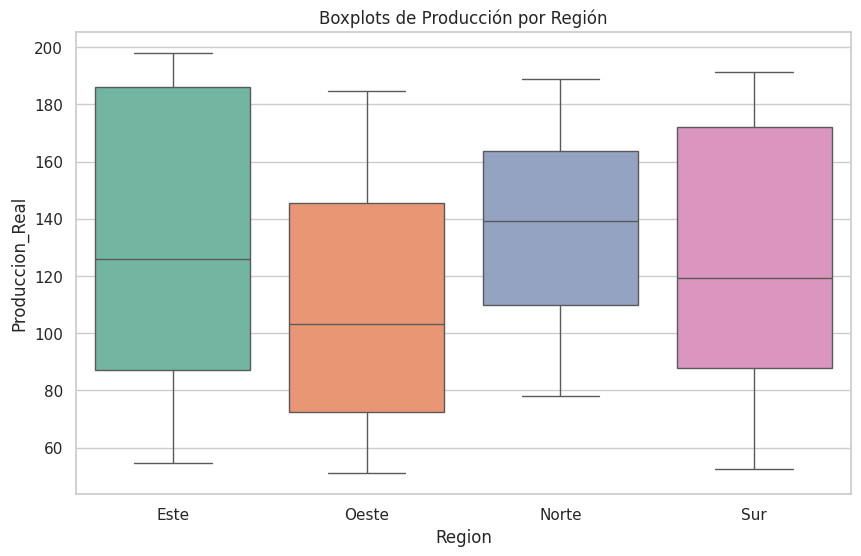

/tmp/ipython-input-3941436256.py:101: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




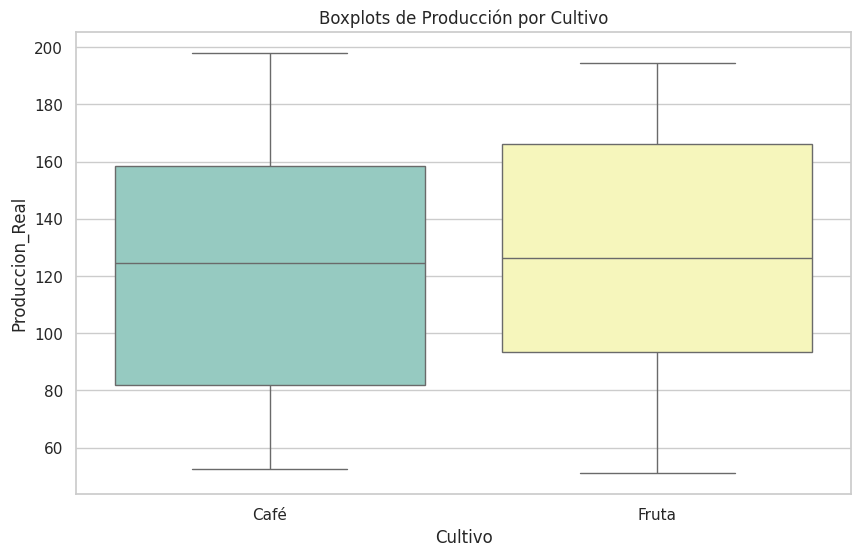

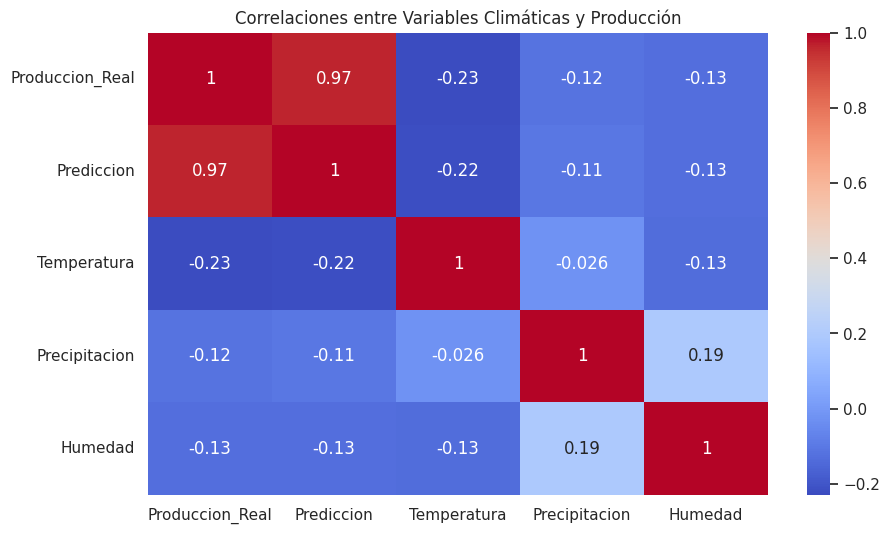

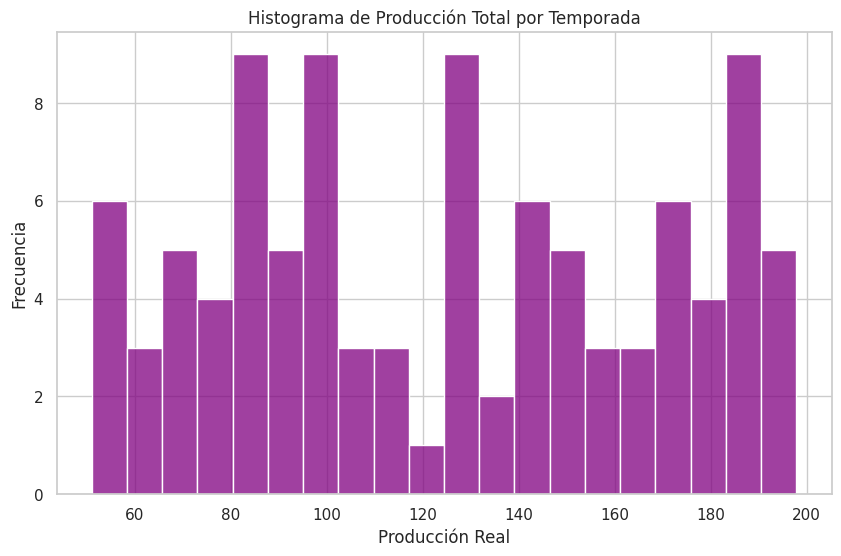

In [18]:
# 🔹 Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración general
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

# -----------------------------
# 1️⃣ Simular datos de ejemplo
# -----------------------------
np.random.seed(42)
n = 100
data = pd.DataFrame({
    'Region': np.random.choice(['Norte', 'Sur', 'Este', 'Oeste'], n),
    'Cultivo': np.random.choice(['Café', 'Fruta'], n),
    'Produccion_Real': np.random.uniform(50, 200, n),
})

# Simular predicciones
data['Prediccion'] = data['Produccion_Real'] * np.random.uniform(0.85, 1.15, n)

# Simular fechas para tendencias
data['Fecha'] = pd.date_range(start='2023-01-01', periods=n, freq='W')

# Coordenadas de ejemplo para mapa estático
data['Lat'] = np.random.uniform(-5,5,n)
data['Lon'] = np.random.uniform(-5,5,n)

# -----------------------------
# 2️⃣ Comparación Producción Real vs Predicha
# -----------------------------
plt.scatter(data['Produccion_Real'], data['Prediccion'], c='green', alpha=0.6)
plt.plot([50, 200], [50, 200], 'r--')
plt.title("Comparación Producción Real vs Predicha")
plt.xlabel("Producción Real")
plt.ylabel("Predicción")
plt.show()

# -----------------------------
# 3️⃣ Distribución de Errores de Predicción
# -----------------------------
data['Error'] = data['Prediccion'] - data['Produccion_Real']
sns.histplot(data['Error'], bins=20, kde=True, color='skyblue')
plt.title("Distribución de Errores de Predicción")
plt.xlabel("Error")
plt.show()

# -----------------------------
# 4️⃣ Tendencias de Producción por Temporada
# -----------------------------
data_sorted = data.sort_values('Fecha')
plt.plot(data_sorted['Fecha'], data_sorted['Produccion_Real'], label='Real')
plt.plot(data_sorted['Fecha'], data_sorted['Prediccion'], label='Predicción')
plt.title("Tendencias de Producción por Temporada")
plt.xlabel("Fecha")
plt.ylabel("Producción")
plt.legend()
plt.show()

# -----------------------------
# 5️⃣ Producción Promedio por Región
# -----------------------------
region_avg = data.groupby('Region')[['Produccion_Real','Prediccion']].mean().reset_index()
region_avg.plot(x='Region', kind='bar', y=['Produccion_Real','Prediccion'])
plt.title("Producción Promedio por Región")
plt.ylabel("Producción")
plt.show()

# -----------------------------
# 6️⃣ Producción Promedio por Cultivo
# -----------------------------
cultivo_avg = data.groupby('Cultivo')[['Produccion_Real','Prediccion']].mean().reset_index()
cultivo_avg.plot(x='Cultivo', kind='bar', y=['Produccion_Real','Prediccion'], color=['orange','blue'])
plt.title("Producción Promedio por Cultivo")
plt.ylabel("Producción")
plt.show()

# -----------------------------
# 7️⃣ Mapa de Rendimiento por Parcela (Estático)
# -----------------------------
plt.scatter(data['Lon'], data['Lat'], c=data['Produccion_Real'], cmap='viridis', s=50)
plt.colorbar(label='Producción Real')
plt.title("Mapa de Rendimiento por Parcela (Estático)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

# -----------------------------
# 8️⃣ Boxplots de Producción por Región
# -----------------------------
sns.boxplot(x='Region', y='Produccion_Real', data=data, palette='Set2')
plt.title("Boxplots de Producción por Región")
plt.show()

# -----------------------------
# 9️⃣ Boxplots de Producción por Cultivo
# -----------------------------
sns.boxplot(x='Cultivo', y='Produccion_Real', data=data, palette='Set3')
plt.title("Boxplots de Producción por Cultivo")
plt.show()

# -----------------------------
# 10️⃣ Correlaciones entre Variables Climáticas y Producción
# -----------------------------
# Simular variables climáticas
data['Temperatura'] = np.random.uniform(18, 30, n)
data['Precipitacion'] = np.random.uniform(0, 200, n)
data['Humedad'] = np.random.uniform(40, 90, n)

corr = data[['Produccion_Real','Prediccion','Temperatura','Precipitacion','Humedad']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlaciones entre Variables Climáticas y Producción")
plt.show()

# -----------------------------
# 11️⃣ Histograma de Producción Total por Temporada
# -----------------------------
sns.histplot(data['Produccion_Real'], bins=20, color='purple', kde=False)
plt.title("Histograma de Producción Total por Temporada")
plt.xlabel("Producción Real")
plt.ylabel("Frecuencia")
plt.show()
